In [1]:
!nvidia-smi

Fri Jun 17 21:22:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   55C    P8    12W /  N/A |    544MiB /  6144MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


Saved under helper_functions.py


In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# Download the data

In [10]:
# Get 10% of the data
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


Saved under 10_food_classes_10_percent.zip


In [3]:
# Check images and subdirectories
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [4]:
# Create training and test directories paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [5]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_precent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_data_10_precent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
# Check out class names of dataset
train_data_10_precent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
# See the example of batch data
for images, labels in train_data_10_precent.take(1):
    print(images, labels)

tf.Tensor(
[[[[177.64287   161.64287   136.64287  ]
   [179.38264   163.38264   138.38264  ]
   [177.43367   161.43367   136.43367  ]
   ...
   [106.658035   88.44377    76.576485 ]
   [116.57643    99.719315   92.719315 ]
   [ 83.948425   70.361664   66.12193  ]]

  [[175.18878   158.18878   132.18878  ]
   [175.21428   158.21428   132.21428  ]
   [173.21428   156.        130.42856  ]
   ...
   [189.14284   170.92857   158.50005  ]
   [201.03064   184.17352   176.3113   ]
   [178.9023    165.9023    159.9023   ]]

  [[168.86224   151.43367   123.005104 ]
   [167.9847    150.55612   122.12755  ]
   [168.61734   150.97449   124.7602   ]
   ...
   [190.19397   172.40823   157.9797   ]
   [195.41336   181.41336   170.52562  ]
   [191.67818   178.67818   170.46388  ]]

  ...

  [[140.92342   103.28062    14.494884 ]
   [137.35712   100.35712    12.3571205]
   [133.99998    95.99998    11.42855  ]
   ...
   [143.78574    64.142944   21.785736 ]
   [145.80104    67.80104    21.801043 ]
   [1

## Model 0: Functional API (Baseline)

In [8]:
# Create model using tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

#Create inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224,3), name="input_layer")

# if using models like ResNet50V2, we need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Normalization(1./255)(inputs)

# Pass the inputs to the base model
x = base_model(inputs)
print("Shape after passing inputs through base model: ", x.shape)

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print("Shape after GlobalAveragePooling2D: ", x.shape)

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

Shape after passing inputs through base model:  (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:  (None, 1280)


In [9]:
# Compile the model
model_0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [10]:
# Fit the model
history_0 = model_0.fit(
    train_data_10_precent,
    epochs=5,
    steps_per_epoch=len(train_data_10_precent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback(dir_name="transfer_learning", 
                                           experiment_name="10_percent_feature_extraction")]
)

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220616-203928
Epoch 1/5
24/24 [==============================] - 15s 184ms/step - loss: 1.8267 - accuracy: 0.4600 - val_loss: 1.2925 - val_accuracy: 0.7303
Epoch 2/5
24/24 [==============================] - 3s 107ms/step - loss: 1.0698 - accuracy: 0.7653 - val_loss: 0.8872 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 3s 107ms/step - loss: 0.7610 - accuracy: 0.8307 - val_loss: 0.7097 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 3s 107ms/step - loss: 0.6310 - accuracy: 0.8547 - val_loss: 0.6397 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 3s 107ms/step - loss: 0.5344 - accuracy: 0.8813 - val_loss: 0.5869 - val_accuracy: 0.8536


In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


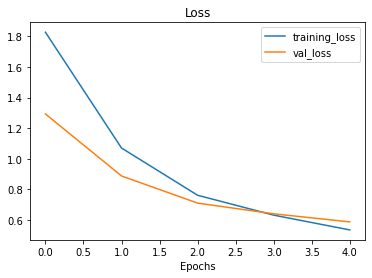

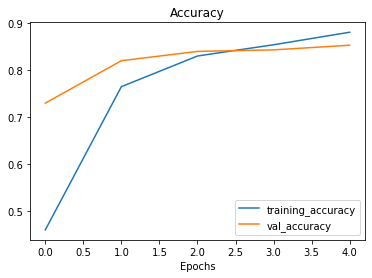

In [12]:
plot_loss_curves(history_0)

In [14]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 57ms/step - loss: 0.5606 - accuracy: 0.8588


[0.5605648756027222, 0.8587999939918518]

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

## Getting a Feature Vector from trained model

In [17]:
# Define the input shape
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor} \n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor} \n")

print(f"Shape of input tensor: {input_tensor.shape}\n")
print(f"Shape of global average pooled random tensor: {global_average_pooled_tensor.shape}\n")

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor: (1, 4, 4, 3)

Shape of global average pooled random tensor: (1, 3)



In [18]:
# Raplicate GlobalAveragePooled2D layer
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Runing a series of transfer learning experiments

# Model 1: 1% of the data

In [19]:
# Download and unzip data - preprocessed from Food101
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")


Saved under 10_food_classes_1_percent (1).zip


In [20]:
# Creating train and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [21]:
# How many images we are working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

## Setup data loaders

In [22]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE) # Default

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./255) # Keep for ResNet50V2
], name="data_augmentation")

### Visualize data augmentation layer

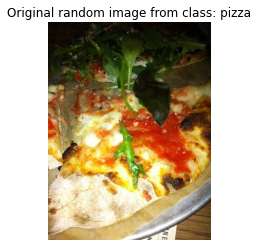

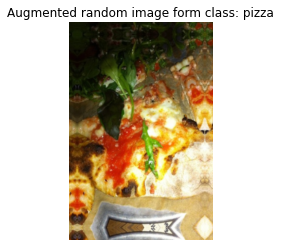

In [24]:
# View a random image and comapare it to augmentaed image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path  = target_dir + "/" + random_image

# Read in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Plot augmented image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augmented random image form class: {target_class}")
plt.axis(False);

## Creating a model

In [25]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x= data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't trainit
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D()(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1_percent =  model_1.fit(train_data_1_percent,
                                epochs=15,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220615-222608
Epoch 1/15
3/3 [==============================] - 7s 1s/step - loss: 2.4593 - accuracy: 0.0714 - val_loss: 2.2473 - val_accuracy: 0.1497
Epoch 2/15
3/3 [==============================] - 2s 821ms/step - loss: 2.2043 - accuracy: 0.1429 - val_loss: 2.1119 - val_accuracy: 0.2599
Epoch 3/15
3/3 [==============================] - 2s 938ms/step - loss: 1.9367 - accuracy: 0.3714 - val_loss: 2.0040 - val_accuracy: 0.3355
Epoch 4/15
3/3 [==============================] - 2s 818ms/step - loss: 1.8368 - accuracy: 0.5286 - val_loss: 1.8876 - val_accuracy: 0.4391
Epoch 5/15
3/3 [==============================] - 2s 873ms/step - loss: 1.6143 - accuracy: 0.6714 - val_loss: 1.8018 - val_accuracy: 0.4424
Epoch 6/15
3/3 [==============================] - 2s 831ms/step - loss: 1.4781 - accuracy: 0.7429 - val_loss: 1.7295 - val_accuracy: 0.4934
Epoch 7/15
3/3 [==============================] - 2s 794ms/step - loss: 1.381

In [26]:
# Check out model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [27]:
# Evaluate on full datasets
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 5s 57ms/step - loss: 1.2086 - accuracy: 0.7164


[1.2086297273635864, 0.7164000272750854]

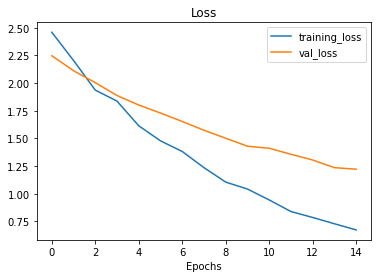

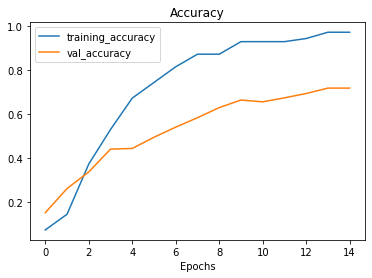

In [28]:
# How does the model with 1 percent data go with data augmentaion
plot_loss_curves(history_1_percent)

# Model 2: 10% data with data augmentation

## Setting up data loaders

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
train_10_percent_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_10_percent_data = tf.keras.preprocessing.image_dataset_from_directory(train_10_percent_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)

test_data = keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             label_mode="categorical",
                                                             image_size=IMG_SIZE,
                                                             batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_10_percent_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Setup data augmentation

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.2),
    layers.RandomWidth(0.2),
    layers.RandomContrast(0.2)
], name="data_augmentation")


In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

Text(0.5, 1.0, 'Augmented image of sushi')

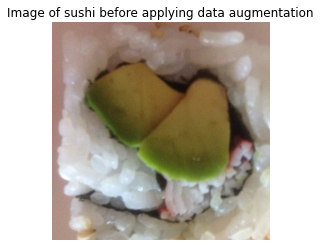

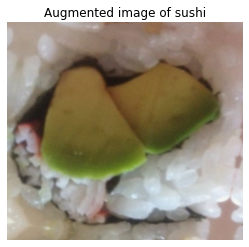

In [8]:
random_class = random.choice(train_10_percent_data.class_names)
class_dir = "10_food_classes_10_percent/train/" + random_class

random_image = random.choice(os.listdir(class_dir))
random_image_path = class_dir + "/" + random_image

img  = mpimg.imread(random_image_path)

plt.imshow(img/255.)
plt.axis(False)
plt.title(f"Image of {random_class} before applying data augmentation");

augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.axis(False)
plt.title(f"Augmented image of {random_class}")

## Create a model with functional API

In [8]:
input_shape = (224, 224, 3)

base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
               metrics=["accuracy"])

## Create Model Checkpoints

In [9]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoints.ckpt"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                            save_weights_only=True,
                                                            save_best_only=False,
                                                           save_freq="epoch",
                                                           verbose=0)

## Fitting the model

In [10]:
initial_epochs = 5

history_model_2 = model_2.fit(train_10_percent_data,
           epochs=initial_epochs,
           steps_per_epoch=len(train_10_percent_data),
           validation_data=test_data,
           validation_steps=int(0.25 * len(test_data)),
            callbacks=[model_checkpoint_callback, create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="10_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220617-212250
Epoch 1/5
24/24 [==============================] - 17s 426ms/step - loss: 2.0393 - accuracy: 0.3027 - val_loss: 1.5381 - val_accuracy: 0.5674
Epoch 2/5
24/24 [==============================] - 8s 310ms/step - loss: 1.4038 - accuracy: 0.6320 - val_loss: 1.0617 - val_accuracy: 0.7467
Epoch 3/5
24/24 [==============================] - 7s 283ms/step - loss: 1.0596 - accuracy: 0.7427 - val_loss: 0.8668 - val_accuracy: 0.7714
Epoch 4/5
24/24 [==============================] - 7s 281ms/step - loss: 0.9144 - accuracy: 0.7667 - val_loss: 0.7666 - val_accuracy: 0.7829
Epoch 5/5
24/24 [==============================] - 7s 281ms/step - loss: 0.8252 - accuracy: 0.7853 - val_loss: 0.7053 - val_accuracy: 0.7878


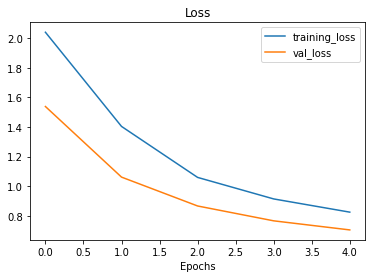

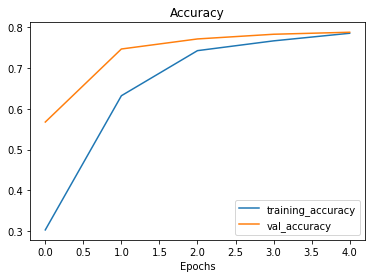

In [11]:
plot_loss_curves(history_model_2)

In [12]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.7141 - accuracy: 0.8032


[0.7141461372375488, 0.8032000064849854]

In [13]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [14]:
data_augmentation.summary()

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_height (RandomHeight  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_width (RandomWidth)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)

In [16]:
# model 0 evaluation
result_10_pecent = model_0.evaluate(test_data)
result_10_pecent

NameError: name 'model_0' is not defined

In [15]:
# Model 2 evaluation
result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 5s 55ms/step - loss: 0.7141 - accuracy: 0.8032


[0.7141463160514832, 0.8032000064849854]

## Loading in the checkpointed weights

In [16]:
model_2.load_weights(checkpoint_path)

In [17]:
# Evaluate model 2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 5s 56ms/step - loss: 0.7141 - accuracy: 0.8032


[0.7141460180282593, 0.8032000064849854]

In [18]:
loaded_weights_model_results == result_10_percent_data_aug

False

In [19]:
# Check how close results are
import numpy as np
np.isclose(np.array(loaded_weights_model_results), np.array(result_10_percent_data_aug))

array([ True,  True])

# Model 3: Fine-tuning model with 10% data

In [20]:
# layers in our loaded model
model_2.layers

In [21]:
# Are layers trainable
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001A0EB927070> True
<keras.engine.sequential.Sequential object at 0x000001A0EB9251B0> True
<keras.engine.functional.Functional object at 0x000001A1DD563880> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x000001A1DD4EF7C0> True
<keras.layers.core.dense.Dense object at 0x000001A1DE74C850> True


In [22]:
# What layers are in our base model (EfficientNetB0) and if they are trainable.
for i, layer in enumerate(model_2.layers[2].layers):
    print(f"No. {i} --> {layer.name} --> {layer.trainable}")

No. 0 --> input_1 --> False
No. 1 --> rescaling --> False
No. 2 --> normalization --> False
No. 3 --> stem_conv_pad --> False
No. 4 --> stem_conv --> False
No. 5 --> stem_bn --> False
No. 6 --> stem_activation --> False
No. 7 --> block1a_dwconv --> False
No. 8 --> block1a_bn --> False
No. 9 --> block1a_activation --> False
No. 10 --> block1a_se_squeeze --> False
No. 11 --> block1a_se_reshape --> False
No. 12 --> block1a_se_reduce --> False
No. 13 --> block1a_se_expand --> False
No. 14 --> block1a_se_excite --> False
No. 15 --> block1a_project_conv --> False
No. 16 --> block1a_project_bn --> False
No. 17 --> block2a_expand_conv --> False
No. 18 --> block2a_expand_bn --> False
No. 19 --> block2a_expand_activation --> False
No. 20 --> block2a_dwconv_pad --> False
No. 21 --> block2a_dwconv --> False
No. 22 --> block2a_bn --> False
No. 23 --> block2a_activation --> False
No. 24 --> block2a_se_squeeze --> False
No. 25 --> block2a_se_reshape --> False
No. 26 --> block2a_se_reduce --> False
No

In [23]:
# how many trainable variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [24]:
# To begin fine tuning, lets start by setting last 10 layers of our base_model.trainable =True
base_model.trainable = True

# Freeze all layers except last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False
    
# Recompile (Do this every time we make change in model)
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning, lower the learning rate by 10x
               metrics=["accuracy"])

In [25]:
# Check which layers are tunable
for layer_number, layer in enumerate(model_2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [26]:
# Checking trainable variable after unfrezzein some layers
print(len(model_2.trainable_variables))

12


In [27]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_fine_10_percent_data_aug = model_2.fit(train_10_percent_data,
                                            epochs=fine_tune_epochs,
                                            validation_data=test_data,
                                            validation_steps=int(0.25 * len(test_data)),
                                            initial_epoch=history_model_2.epoch[-1],
                                            callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220617-212659
Epoch 5/10
24/24 [==============================] - 12s 325ms/step - loss: 0.6869 - accuracy: 0.8147 - val_loss: 0.5577 - val_accuracy: 0.8092
Epoch 6/10
24/24 [==============================] - 6s 240ms/step - loss: 0.5752 - accuracy: 0.8120 - val_loss: 0.5230 - val_accuracy: 0.8273
Epoch 7/10
24/24 [==============================] - 6s 245ms/step - loss: 0.5037 - accuracy: 0.8480 - val_loss: 0.5135 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 6s 254ms/step - loss: 0.4621 - accuracy: 0.8560 - val_loss: 0.5008 - val_accuracy: 0.8224
Epoch 9/10
24/24 [==============================] - 5s 216ms/step - loss: 0.4154 - accuracy: 0.8840 - val_loss: 0.4847 - val_accuracy: 0.8421
Epoch 10/10
24/24 [==============================] - 5s 224ms/step - loss: 0.3721 - accuracy: 0.8867 - val_loss: 0.4655 - val_accuracy: 0.8322


In [28]:
# Evaluate the fine-tuned model 
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 5s 56ms/step - loss: 0.4859 - accuracy: 0.8372


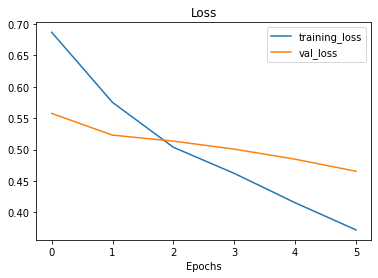

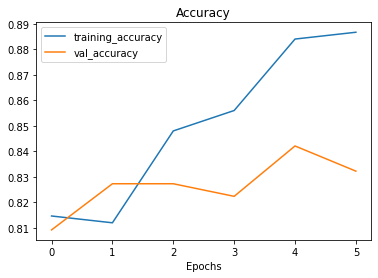

In [29]:
# Check out plot loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

In [30]:
# Create a function to compate training histories
def compare_histories(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow History objects
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]
                                    
    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]
    
    # combine original history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]
    
    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]
    
    # Make plot for accuracy
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label="Training Accuracy")
    plt.plot(total_val_acc, label="Val Accuracy")
    plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")
    
    # Make plot for loss
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_loss, label="Training Loss")
    plt.plot(total_val_loss, label="Val Loss")
    plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="upper right")
    plt.title("Training and Validation loss")

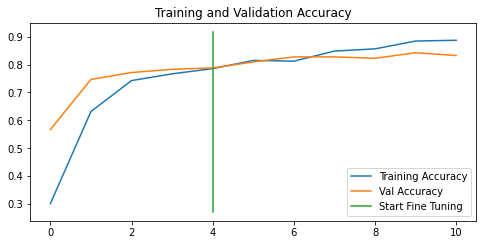

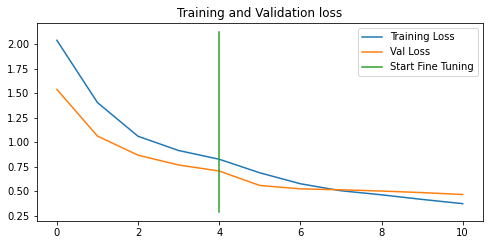

In [33]:
compare_histories(history_model_2, history_fine_10_percent_data_aug, initial_epochs=5)

# Model 4: Fine tuning existing model on 100% data

In [35]:
# Download and unzip 10 classes of Food101 data with all images
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")


Saved under 10_food_classes_all_data.zip


In [36]:
# print training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [37]:
# How many images are we working with
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [38]:
# Setup data inputs
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [40]:
# Evaluate model 2
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.4859 - accuracy: 0.8372


[0.48592621088027954, 0.8371999859809875]

In [41]:
results_fine_tune_10_percent

[0.4859263300895691, 0.8371999859809875]

In [42]:
# Load checkpoint weights to remove fine tuned version
model_2.load_weights(checkpoint_path)

In [44]:
# After removing fine tuning, accuracy is low and loss is high
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.7141 - accuracy: 0.8032


[0.7141461372375488, 0.8032000064849854]

In [46]:
# compare it to original evaluation of model_2
result_10_percent_data_aug

[0.7141463160514832, 0.8032000064849854]

In [47]:
# Check which layers are tunable in model-2

for layer_number, layer in enumerate(model_2.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d True
4 output_layer True


In [50]:
# Check the same for EfficientNetB0

for layer_number, layer in enumerate(model_2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [52]:
# Compile the model
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [61]:
# Continue to train and fit the model
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                         epochs=fine_tune_epochs,
                                         validation_data=test_data,
                                         validation_steps=int(0.25*len(test_data)),
                                         initial_epoch=history_model_2.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                               experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220617-221001
Epoch 5/10
235/235 [==============================] - 26s 109ms/step - loss: 0.3904 - accuracy: 0.8715 - val_loss: 0.3279 - val_accuracy: 0.9079
Epoch 6/10
235/235 [==============================] - 25s 105ms/step - loss: 0.3728 - accuracy: 0.8744 - val_loss: 0.3531 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 25s 108ms/step - loss: 0.3534 - accuracy: 0.8849 - val_loss: 0.3278 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 26s 111ms/step - loss: 0.3315 - accuracy: 0.8972 - val_loss: 0.3127 - val_accuracy: 0.9030
Epoch 9/10
235/235 [==============================] - 25s 105ms/step - loss: 0.3176 - accuracy: 0.8971 - val_loss: 0.3237 - val_accuracy: 0.8980
Epoch 10/10
235/235 [==============================] - 24s 104ms/step - loss: 0.2944 - accuracy: 0.9061 - val_loss: 0.3335 - val_accuracy: 0.8947


model_3 end: loss: 0.3721 - accuracy: 0.8867 - val_loss: 0.4655 - val_accuracy: 0.8322

In [62]:
# Evaluate on all the data
result_fine_tune_full_data = model_2.evaluate(test_data)

79/79 [==============================] - 5s 55ms/step - loss: 0.3216 - accuracy: 0.8972


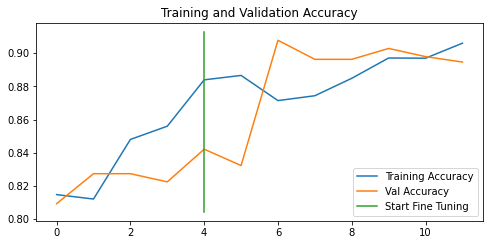

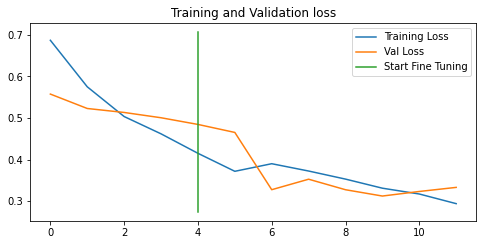

In [63]:
# Compare fine tuning with all data vs 10% data
compare_histories(original_history=history_fine_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

# View our expermients data on TensorBoard

In [70]:
# View tensorboard logs of transfer learning modelling experments
# Upload TensorBoard logs
!tensorboard dev upload --logdir ./transfer_learning --name "Transfer learning experiments" --description "Experments" --one_shot


^C
